# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [109]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [102]:
df = pd.read_csv('../data/states_edu.csv')
df.shape
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [103]:
# let's rename our columns to make them more intuitive
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)


df.dropna()

# Since my analysis will focus on Grade 4 Reading, I will drop all the rows where the 4th grading reading score is missing
df.dropna(subset=['AVG_READING_4_SCORE'], inplace=True)


df["ENROLL_ALL_EST"] = df["ENROLL_ALL_EST"].fillna(df["ENROLL_ALL"])
print(df)

             PRIMARY_KEY          STATE  YEAR  ENROLL_ALL_EST  TOTAL_REVENUE  \
0           1992_ALABAMA        ALABAMA  1992        731634.0      2678885.0   
2           1992_ARIZONA        ARIZONA  1992        673477.0      3258079.0   
3          1992_ARKANSAS       ARKANSAS  1992        441490.0      1711959.0   
4        1992_CALIFORNIA     CALIFORNIA  1992       5254844.0     26260025.0   
5          1992_COLORADO       COLORADO  1992        612635.0      3185173.0   
...                  ...            ...   ...             ...            ...   
1710       2019_VIRGINIA       VIRGINIA  2019             NaN            NaN   
1711     2019_WASHINGTON     WASHINGTON  2019             NaN            NaN   
1712  2019_WEST_VIRGINIA  WEST_VIRGINIA  2019             NaN            NaN   
1713      2019_WISCONSIN      WISCONSIN  2019             NaN            NaN   
1714        2019_WYOMING        WYOMING  2019             NaN            NaN   

      FEDERAL_REVENUE  STATE_REVENUE  L

<h2>Exploratory Data Analysis (EDA) </h2>

How many years of data are logged in our dataset? 

In [98]:
# first, we group our data by the years. then, we print out the length of it, which gives us the number of rows in our grouped by year data.
yearsOfData = df.groupby("YEAR")
print(len(yearsOfData))

14


Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [99]:
df2 = df

df2.set_index("STATE", inplace = True)
michData = df2.loc["MICHIGAN"]
michAverage = michData["AVG_READING_4_SCORE"].mean()
print("The average Grade 4 Reading Score in Michigan across all years is: " + str(michAverage))

ohioData = df2.loc["OHIO"]
ohioAverage = ohioData["AVG_READING_4_SCORE"].mean()
print("The average Grade 4 Reading Score in Ohio across all years is: " + str(ohioAverage))

print("Comparing the values, Ohio has a higher average Grade 4 Reading score across all years.")
      

The average Grade 4 Reading Score in Michigan across all years is: 217.83333333333334
The average Grade 4 Reading Score in Ohio across all years is: 223.1818181818182
Comparing the values, Ohio has a higher average Grade 4 Reading score across all years.


Find the average for your outcome score across all states in 2019

In [104]:
df3 = df.loc[df["YEAR"] == 2019]
df3
# states = df3.groupby("STATE")
statesNum = df3["STATE"].nunique()
total = df3['AVG_READING_4_SCORE'].sum()
avgOutcomeScore = total / statesNum
print(avgOutcomeScore)

219.79245283018867


Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [105]:
df4 = df
statesData = df4.groupby("STATE")
statesData["AVG_READING_4_SCORE"].max()

STATE
ALABAMA                 220.0
ALASKA                  214.0
ARIZONA                 216.0
ARKANSAS                219.0
CALIFORNIA              216.0
COLORADO                227.0
CONNECTICUT             230.0
DELAWARE                226.0
DISTRICT_OF_COLUMBIA    214.0
DODEA                   235.0
FLORIDA                 228.0
GEORGIA                 222.0
HAWAII                  218.0
IDAHO                   223.0
ILLINOIS                222.0
INDIANA                 227.0
IOWA                    225.0
KANSAS                  225.0
KENTUCKY                228.0
LOUISIANA               216.0
MAINE                   228.0
MARYLAND                232.0
MASSACHUSETTS           237.0
MICHIGAN                220.0
MINNESOTA               227.0
MISSISSIPPI             219.0
MISSOURI                224.0
MONTANA                 227.0
NATIONAL                223.0
NEBRASKA                227.0
NEVADA                  218.0
NEW_HAMPSHIRE           232.0
NEW_JERSEY              233.0
NEW_

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

<AxesSubplot:title={'center':'Distribution of 4th Grade Reading Scores'}, ylabel='Frequency'>

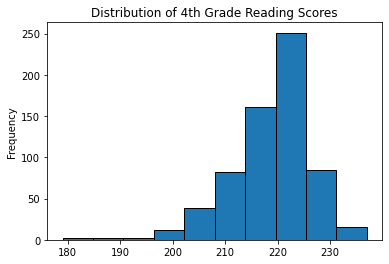

In [107]:
df['SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT'] = df['SUPPORT_SERVICES_EXPENDITURE'] / df['ENROLL_ALL']

df.AVG_READING_4_SCORE.plot.hist(title="Distribution of 4th Grade Reading Scores", edgecolor="black")

Feature engineering justification: **I thought that the amount of expenditure on a student might affect the 4th grade reading scores, so I created a column which calculates the amount spent on each student. Above in previous sections, I dropped any rows that had NaN values for 4th grade reading scores and renamed the columns for easier readability.**

Text(0.5, 1.0, '4th Grade Reading Score Over Time')

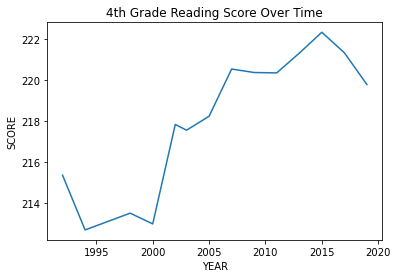

In [121]:
df.groupby('YEAR')["AVG_READING_4_SCORE"].mean().plot()
plt.ylabel('SCORE')
plt.title('4th Grade Reading Score Over Time')

Text(0, 0.5, '4th Grade Reading Score')

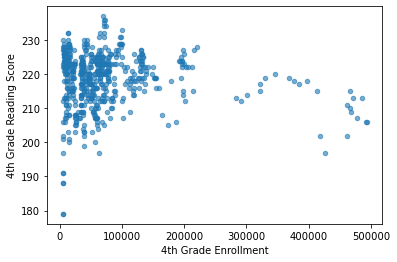

In [111]:
df.plot.scatter(x='ENROLL_4', y='AVG_READING_4_SCORE', alpha=0.6)
plt.xlabel('4th Grade Enrollment')
plt.ylabel('4th Grade Reading Score')

Text(0, 0.5, '4th Grade Reading Score')

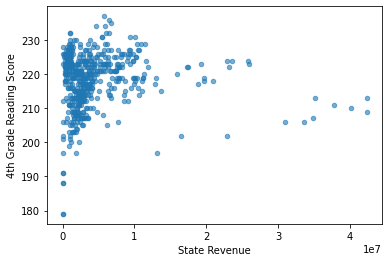

In [112]:
df.plot.scatter(x='STATE_REVENUE', y='AVG_READING_4_SCORE', alpha=0.6)
plt.xlabel('State Revenue')
plt.ylabel('4th Grade Reading Score')

Text(0, 0.5, '4th Grade Reading Score')

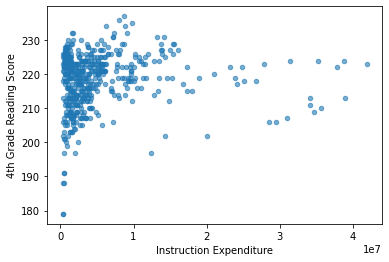

In [113]:
df.plot.scatter(x='INSTRUCTION_EXPENDITURE', y='AVG_READING_4_SCORE', alpha=0.6)
plt.xlabel('Instruction Expenditure')
plt.ylabel('4th Grade Reading Score')

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

<AxesSubplot:xlabel='AVG_READING_4_SCORE', ylabel='AVG_READING_8_SCORE'>

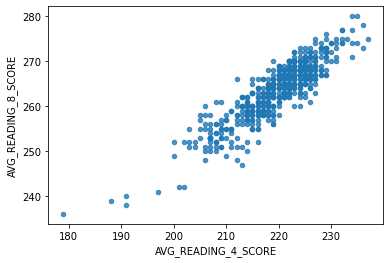

In [119]:
df.plot.scatter(x='AVG_READING_4_SCORE', y='AVG_READING_8_SCORE', alpha=0.8)

**This scatterplot demonstrates the strong positive correlation between average 4th grade reading scores and average 8th grade reading scores. They seem to have a positive correlation, which would make them a good predictor for the model.**

**Visualization 2**

<AxesSubplot:xlabel='AVG_READING_4_SCORE', ylabel='AVG_MATH_8_SCORE'>

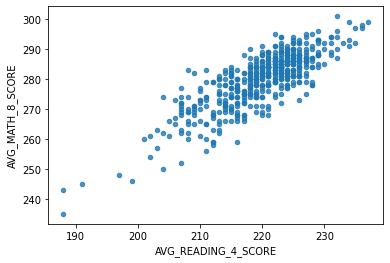

In [120]:
df.plot.scatter(x='AVG_READING_4_SCORE', y='AVG_MATH_8_SCORE', alpha=0.8)

**<This scatterplot demonstrates the strong positive correlation between average 4th grade reading scores and average 8th grade math scores. They also seem to have a positive correlation, which would make them a good predictor for the model.>**

<AxesSubplot:xlabel='AVG_READING_4_SCORE', ylabel='SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT'>

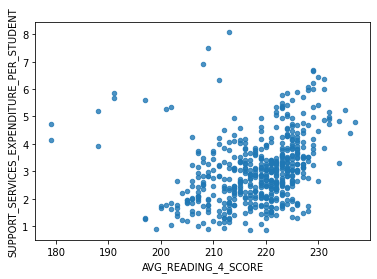

In [122]:
df.plot.scatter(x='AVG_READING_4_SCORE', y='SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT', alpha=0.8)

In [ ]:
**<This scatterplot demonstrates the correlation between average 4th grade reading scores and support expenditure per state. They do not seem to have a strong correlation, which would not make them a good predictor for the model.>**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [123]:
from sklearn.model_selection import train_test_split

In [137]:
X = df[['AVG_MATH_8_SCORE','AVG_READING_8_SCORE']].dropna()
y = df.loc[X.index]['AVG_READING_4_SCORE']
y.fillna(y.mean(), inplace=True)

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [139]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [140]:
# create your model here
model = LinearRegression()

In [141]:
model.fit(X_train, y_train)

LinearRegression()

In [142]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [143]:
# First, I will examine the R^2 value because it describes how well a linear model fits the data
print(model.score(X_test, y_test))

# Next, I will examine the mean absolute error. 
print(np.mean(np.abs(model.predict(X_test)-y_test)))

0.8281271574321372
2.2134264906942676


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

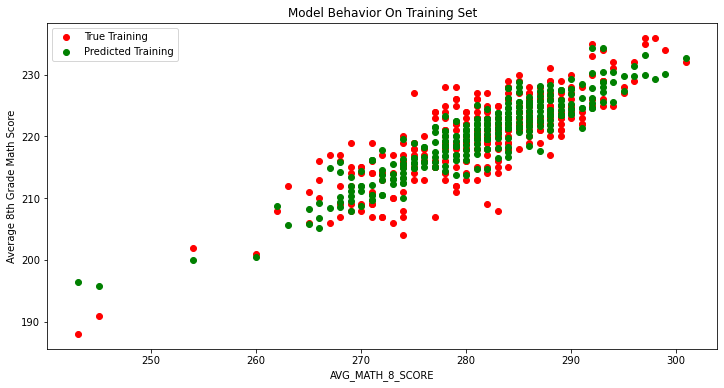

In [144]:
col_name = 'AVG_MATH_8_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Average 8th Grade Math Score')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

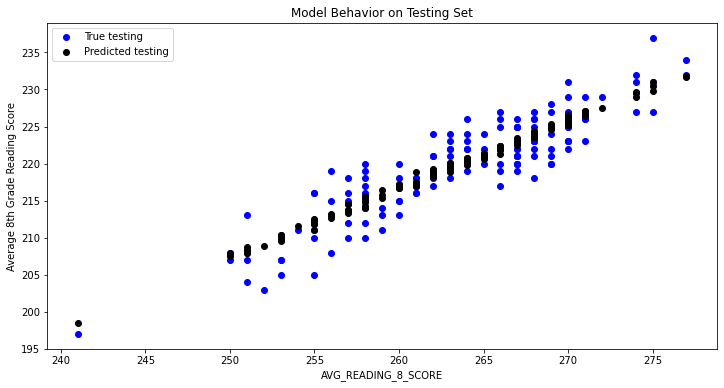

In [145]:
col_name = 'AVG_READING_8_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Average 8th Grade Reading Score')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

**In this checkpoint, I examined the US Education Dataset and tried to figure out a good predictor for the Average 4th grade reading scores. I started by cleaning up the data - removing any NaN data values in the 4th grade reading scores, renaming columns for readability/understanding, and added a column that calculated the average state expenditure on students. Next, I looked at scatterplots of various variables that I thought would be good predictors for 4th grade reading scores. These included the average 8th grade math and reading scores. Then, using a 70/30 test train split, I trained a linear regression model on these variables. Looking at the output produced above and the performance metrics, the model score is not as high as I would like it to be. This tells me that my predictor variables didn't have as much of an impact on the 4th grade reading scores as I thought they would. In the future, I would try experimenting with enrollment, and individual expenditure**